In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('weight-height.csv')
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [43]:
# inch = 2.54cm lbs = 0.45359237
df['Height'] = df['Height'].apply(lambda x : x*2.54)
df['Weight'] = df['Weight'].apply(lambda x : x*0.45359237)
df.head(5)

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695


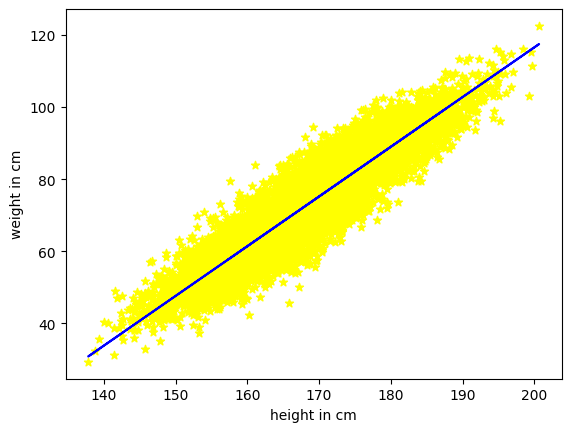

In [55]:
plt.xlabel("height in cm")
plt.ylabel("weight in cm")
plt.scatter(df.Height, df.Weight, color = "yellow", marker = "*")
plt.plot(df.Height, df.predicted_weight, color = "blue")

In [45]:
from sklearn import linear_model

In [46]:
model = linear_model.LinearRegression()

In [47]:
model.fit(df[['Height']], df.Weight)

LinearRegression()

In [48]:
model.coef_

array([1.37815071])

In [49]:
model.intercept_

-159.09171408121213

In [50]:
model.predict([[178]])

D:\Learning\mvenv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.21911143])

In [51]:
df['predicted_weight'] = model.predict(df[['Height']])

In [52]:
df

,Gender,Height,Weight,predicted_weight
0,Male,187.571423,109.721075,99.409975
1,Male,174.706036,73.622792,81.679533
2,Male,188.239668,96.497629,100.330917
3,Male,182.196685,99.809586,92.002776
4,Male,177.499761,93.598695,85.529707
...,...,...,...,...
9995,Female,168.078536,62.041210,72.545839
9996,Female,170.350573,77.504378,75.677048
9997,Female,162.224700,58.275424,64.478371
9998,Female,175.346978,74.322226,82.562847


In [53]:
df['diff'] = df['Weight'] - df['predicted_weight']
df

,Gender,Height,Weight,predicted_weight,diff
0,Male,187.571423,109.721075,99.409975,10.311100
1,Male,174.706036,73.622792,81.679533,-8.056741
2,Male,188.239668,96.497629,100.330917,-3.833288
3,Male,182.196685,99.809586,92.002776,7.806810
4,Male,177.499761,93.598695,85.529707,8.068988
...,...,...,...,...,...
9995,Female,168.078536,62.041210,72.545839,-10.504630
9996,Female,170.350573,77.504378,75.677048,1.827330
9997,Female,162.224700,58.275424,64.478371,-6.202947
9998,Female,175.346978,74.322226,82.562847,-8.240620
